In [1]:
import json
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
v1=json.load(open('MC1.json'))

In [3]:
print(v1['links'][0].values())
print(v1['links'][0].keys())
print(v1['nodes'][0].keys())
print(v1['nodes'][0].values())

dict_values(['ownership', 0.90013963, 'MC1', 'Spanish Shrimp  Carriers', 12744, 0])
dict_keys(['type', 'weight', 'dataset', 'source', 'target', 'key'])
dict_keys(['type', 'dataset', 'country', 'id'])
dict_values(['company', 'MC1', 'Nalakond', 'Spanish Shrimp  Carriers'])


In [4]:
node_keys=list(v1['nodes'][0].keys())
for i in v1['nodes']:
    for j in node_keys:
        if j not in i.keys():
            i[j]=None

In [5]:
# nodes_df=pd.DataFrame(columns=list(v1['nodes'][0].keys()))
# nodes_df.append(list(i.values()) for i in v1['nodes'])
nodes_df=pd.DataFrame(v1['nodes'])
nodes_df.head()

,type,dataset,country,id
0,company,MC1,Nalakond,Spanish Shrimp Carriers
1,organization,MC1,None,12744
2,organization,MC1,None,143129355
3,organization,MC1,None,7775
4,organization,MC1,None,1017141


In [6]:
link_keys=list(v1['links'][0].keys())
for i in v1['links']:
    for j in link_keys:
        if j not in i.keys():
            i[j]=None
links_df=pd.DataFrame(v1['links'])
links_df.head()

,type,weight,dataset,source,target,key,weightlcoat
0,ownership,0.900140,MC1,Spanish Shrimp Carriers,12744,0,NaN
1,partnership,0.845897,MC1,Spanish Shrimp Carriers,21323516,0,NaN
2,partnership,0.964876,MC1,Spanish Shrimp Carriers,290834957,0,NaN
3,ownership,0.964213,MC1,Spanish Shrimp Carriers,3506021,0,NaN
4,family_relationship,0.823486,MC1,Spanish Shrimp Carriers,Conventionâ,0,NaN


In [7]:
link_keys=list(v1['links'][0].keys())
multiedges=[i for i in v1['links'] if i['key']>0]
multiedges_exclude={}
for i in multiedges:
    pair=(i['source'],i['target'])
    if pair not in multiedges_exclude.keys():
        multiedges_exclude[pair]=i['key']
    elif i['key']>multiedges_exclude[pair]:
        multiedges_exclude[pair]=i['key']
# multiedges_exclude

In [8]:
len(multiedges)

492

In [9]:
target_nodes=[]
for i in multiedges_exclude.keys():
    if i[0] not in target_nodes:
        target_nodes.append(i[0])
    if i[1] not in target_nodes:
        target_nodes.append(i[1])

In [10]:
print(target_nodes)

['Spanish Shrimp  Carriers', 'Ocean Fisheries Llc', 'Faroe Islands Shrimp Shark', 185040354, 'Christopher Cunningham', 341411, 'Playa del Cielo Kga', 'png xi  Line', 'SeaSpray Wave SRL Solutions', 1, 47679, 'DOFâ\x80\x99s', 'Irish Sea Seaside GmbH & Co. KG Distribution', 235866056, 75399, 'b8567859-bf54-49fd-8332-5775e19c65af', 967900443, 903311212, 'Mar del Oeste Pic', 4, 290834957, 750975, 979893388, 95, 265700083, 7298083, '14bda3bb-9993-4265-97cc-1747808c144e', '602ea158-0519-47fc-badc-787721580418', 'St', 49494, 435054320, 'months', 'Tamil Nadu S.p.A.', 'West Bengal S.A. de C.V.', 'Amanda Mckenzie', 'Patricia Bowen', 'Andrea Gibson', 'Seafood', 'Daniel Mason', 'â\x80\x9cTrials', '032522db-8105-4c26-8142-ae9d5806f7c5', 'Stephen Marks', 'electric', 'Jerry Welch', 'Martin Bryant', 'Kerala Market Corp Consulting', 'dbb07e32-a8f4-47d0-ae61-c2e9774e9284', '011ad1ae-ae1b-4c74-9f58-c020e6a3e836', 39, '259e9338-b33e-4dc7-843a-96a720d22d9b', 'days', 1039, '18 wheelers', '165e0fe7-6725-4f4c-

In [11]:
node_dict={}
for i in v1['nodes']:
    node_dict[i['id']]=[i['type'],i['country']]
# node_dict

In [12]:
target_direct_neighbors=[]
for i in target_nodes:
    for j in v1['links']:
        if j['source'] in target_nodes and j['target'] not in target_direct_neighbors:
            target_direct_neighbors.append(j['target'])
        if j['target'] in target_nodes and j['source'] not in target_direct_neighbors:
            target_direct_neighbors.append(j['source'])
dir_nei_type={}
for i in target_direct_neighbors:
    if node_dict[i][0] not in dir_nei_type.keys():
        dir_nei_type[node_dict[i][0]]=1
    else:
        dir_nei_type[node_dict[i][0]]+=1


In [13]:
target_direct_neighbors
type(dir_nei_type['company'])

int

findfont: Font family ['Times new roman'] not found. Falling back to DejaVu Sans.


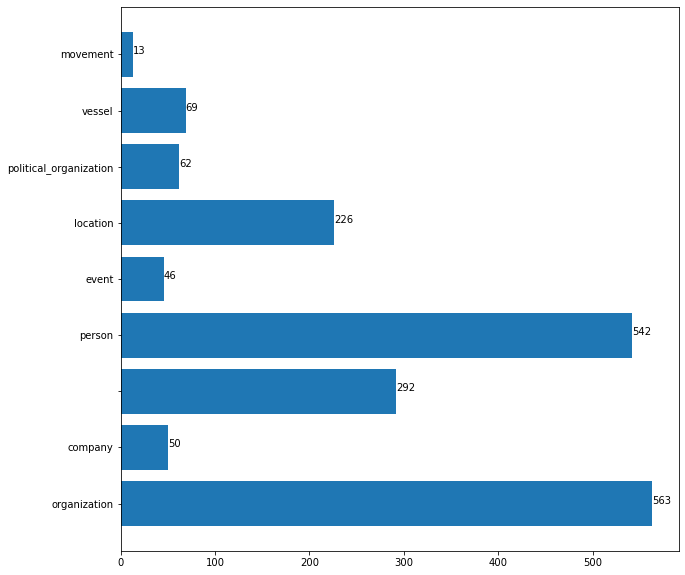

In [14]:
plt.figure(figsize=(10,10))
y=np.arange(len(dir_nei_type.keys()))
bar=plt.barh(y=y,width=dir_nei_type.values(),tick_label=list(dir_nei_type.keys()))
for idx,width in enumerate(dir_nei_type.values()):
    plt.text(width,y[idx],'%d'%width, size=10, family="Times new roman")
plt.show()

In [15]:
##### merge nodes and links together according to source and targets
merged_info=links_df.merge(nodes_df,how='left',left_on='source',right_on='id')
merged_info=merged_info.merge(nodes_df,how='left',left_on='target',right_on='id')
merged_info.drop(['id_x','id_y','weightlcoat','dataset','dataset_y'],axis=1,inplace=True)
merged_info.rename(columns={'type_x':'link_type','type_y':'source_type','country_x':'link_country','country':'source_country',
                            'type':'target_type','country_y':'target_country'},inplace=True)
merged_info.head()


,link_type,weight,dataset_x,source,target,key,source_type,link_country,target_type,target_country
0,ownership,0.900140,MC1,Spanish Shrimp Carriers,12744,0,company,Nalakond,organization,None
1,partnership,0.845897,MC1,Spanish Shrimp Carriers,21323516,0,company,Nalakond,organization,None
2,partnership,0.964876,MC1,Spanish Shrimp Carriers,290834957,0,company,Nalakond,organization,None
3,ownership,0.964213,MC1,Spanish Shrimp Carriers,3506021,0,company,Nalakond,organization,None
4,family_relationship,0.823486,MC1,Spanish Shrimp Carriers,Conventionâ,0,company,Nalakond,None,None


In [32]:
merged_info.info()
merged_info['key'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11069 entries, 0 to 11068
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   link_type       11069 non-null  object 
 1   weight          11068 non-null  float64
 2   dataset_x       11069 non-null  object 
 3   source          11069 non-null  object 
 4   target          11069 non-null  object 
 5   key             11069 non-null  int64  
 6   source_type     8468 non-null   object 
 7   link_country    3003 non-null   object 
 8   target_type     8287 non-null   object 
 9   target_country  3547 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [45]:
df_multi=merged_info[merged_info['key']>0]
df_each=list(df_multi.groupby(['source','target']))
# 变成dict
df_each_dict={}
for i in range(len(df_each)):
    df_each[i][1].sort_values(by='key',inplace=True)
    df_each_dict[df_each[i][0]]=df_each[i][1]
print(len(df_each))
# # 缺失0那条，重新放进来
for i in df_each_dict:
    key_ori=merged_info[(merged_info['source']==i[0])&(merged_info['target']==i[1])&(merged_info['key']==0)]
    df_each_dict[i]=pd.concat([df_each_dict[i],key_ori],axis=0)
df_each_dict.keys()



195


dict_keys([(4, 341411), (95, 341411), (95, 'Ocean Fisheries Llc'), (160, 'Ocean Fisheries Llc'), (160, 'png xi  Line'), (454, 'Ocean Fisheries Llc'), (7691, 'Mar del Oeste Pic'), (47679, 341411), (47679, 'Christopher Cunningham'), (47679, 'Faroe Islands Shrimp Shark'), (47679, 'b8567859-bf54-49fd-8332-5775e19c65af'), (47679, 'png xi  Line'), (49494, 'SeaSpray Wave SRL Solutions'), (49729, 'png xi  Line'), (341411, 1), (341411, 47679), (341411, 75399), (341411, 235866056), (341411, 903311212), (341411, 967900443), (341411, 'Christopher Cunningham'), (341411, 'DOFâ\x80\x99s'), (341411, 'Faroe Islands Shrimp Shark'), (341411, 'Irish Sea Seaside GmbH & Co. KG Distribution'), (341411, 'Playa del Cielo Kga'), (341411, 'SeaSpray Wave SRL Solutions'), (341411, 'b8567859-bf54-49fd-8332-5775e19c65af'), (341411, 'png xi  Line'), (750975, 979893388), (750975, 'png xi  Line'), (6335187, 'Mar del Oeste Pic'), (7298083, 'Ocean Fisheries Llc'), (7505050, 'Playa del Cielo Kga'), (235866056, 341411), (2

In [47]:
undirected=[]
for i in df_each_dict:
    if((i[0],i[1]) in undirected) or ((i[1],i[0]) in undirected):
        continue
    undirected.append(i)
print(len(undirected),len(df_each_dict.keys()))


175 195


In [ ]:
###画一下每一对重边的邻居信息?